# Isolation Forest

For the isolation forest model I tried a larger dataset with the same features as LOF and Kmeans, but also a sm dataset with only two features just to get some more insight on the model


#### Dependencies

In [0]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import shap
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is not" with a literal. Did you mean "!="?
"is not" with a literal. Did you mean "!="?


### Import Data

In [0]:
file_location = "/FileStore/tables/proceessed/part-00000-tid-7216056373568144993-71829a2c-6d1e-4bc4-867b-e7304ed9bfd4-880-1-c000.snappy.parquet"

file_type = "parquet"

df = spark.read.format(file_type) \
  .load(file_location)

df.display()

passenger_count trip_distance PULocationID DOLocationID payment_type fare_amount extra tip_amount total_amount congestion_surcharge time_diff_minutes day_of_week 1.0 0.41 24.0 24.0 1.0 4.0 0.5 1.06 6.36 0.0 2.783 5 1.0 0.41 43.0 43.0 2.0 3.5 0.5 0.0 4.8 0.0 1.033 6 1.0 0.4 24.0 24.0 1.0 4.0 0.5 5.0 10.3 0.0 2.683 6 1.0 0.27 43.0 43.0 2.0 3.0 0.5 0.0 6.8 2.5 0.833 6 1.0 1.34 43.0 43.0 1.0 6.0 0.5 1.0 10.8 2.5 4.967 6 3.0 0.42 43.0 43.0 1.0 3.5 0.5 0.6 5.4 0.0 1.133 6 1.0 3.52 24.0 43.0 1.0 12.5 0.5 1.0 17.3 2.5 12.567 6 1.0 0.9 43.0 43.0 2.0 5.0 2.5 0.0 8.3 2.5 3.783 6 1.0 0.0 43.0 43.0 3.0 5.5 2.5 0.0 8.8 2.5 4.35 6 1.0 0.92 43.0 43.0 1.0 5.5 0.0 1.76 10.56 2.5 4.85 6 1.0 2.1 43.0 43.0 2.0 8.0 0.0 0.0 11.3 2.5 1029.033 6 1.0 0.64 43.0 43.0 2.0 4.5 0.0 0.0 7.8 2.5 2.933 6 1.0 3.4 24.0 43.0 1.0 13.5 2.5 3.35 20.15 2.5 16.4 6 1.0 0.01 43.0 43.0 2.0 2.5 0.0 0.0 5.8 2.5 0.317 6 2.0 0.3 24.0 24.0 1.0 3.5 0.0 0.0 4.3 0.0 2.217 6 1.0 0.91 43.0 43.0 2.0 5.0 0.0 0.0 8.3 2.5 3.483 6 2.0 0.11 43.0 43.0 2.0 2.5 0.0 0.0 5.8 2.5 0.433 6 1.0 1.3 43.0 43.0 1.0 8.0 0.0 1.0 12.3 2.5 9.85 6 1.0 1.59 43.0 43.0 2.0 9.0 0.0 0.0 12.3 2.5 9.633 6 1.0 0.6 43.0 43.0 4.0 8.5 2.5 0.0 11.8 2.5 12.433 6 1.0 1.35 43.0 43.0 1.0 7.0 0.0 1.0 11.3 2.5 6.25 6 1.0 1.2 43.0 43.0 1.0 7.0 0.0 2.06 12.36 2.5 6.933 6 1.0 1.29 43.0 43.0 2.0 7.0 0.0 0.0 10.3 2.5 6.717 6 1.0 0.34 43.0 43.0 1.0 3.5 0.0 1.02 7.82 2.5 1.533 6 5.0 0.83 43.0 43.0 1.0 6.0 0.0 1.86 11.16 2.5 6.4 6 3.0 1.9 43.0 43.0 1.0 11.0 2.5 2.0 16.3 2.5 13.25 6 1.0 1.32 43.0 43.0 1.0 7.5 0.0 2.16 12.96 2.5 7.433 6 1.0 1.86 43.0 43.0 1.0 9.5 0.0 2.56 15.36 2.5 11.533 6 2.0 1.1 43.0 24.0 1.0 6.5 2.5 1.96 11.76 2.5 6.417 6 2.0 1.87 24.0 43.0 1.0 11.0 0.0 2.86 17.16 2.5 14.183 6 1.0 0.52 43.0 43.0 1.0 5.5 0.0 1.32 10.12 2.5 5.9 6 2.0 0.98 43.0 43.0 1.0 6.5 0.0 1.0 10.8 2.5 6.75 6 2.0 1.74 43.0 24.0 1.0 11.5 0.0 2.96 17.76 2.5 15.433 6 3.0 1.04 43.0 43.0 1.0 7.0 0.0 1.7 12.0 2.5 7.483 6 1.0 1.22 43.0 24.0 1.0 7.5 0.0 1.0 9.3 0.0 8.967 6 1.0 1.5 43.0 24.0 1.0 8.0 0.0 1.0 12.3 2.5 8.183 6 1.0 0.15 43.0 43.0 2.0 3.0 0.0 0.0 6.3 2.5 1.133 6 1.0 2.29 43.0 43.0 1.0 14.0 0.0 3.46 20.76 2.5 19.933 6 1.0 1.19 43.0 43.0 1.0 8.0 0.0 2.25 13.55 2.5 9.817 6 2.0 1.89 43.0 43.0 1.0 12.0 0.0 2.3 17.6 2.5 17.3 6 3.0 1.44 43.0 43.0 2.0 8.0 0.0 0.0 11.3 2.5 8.033 6 1.0 2.19 43.0 43.0 1.0 10.0 0.0 2.66 15.96 2.5 11.7 6 5.0 0.77 43.0 43.0 1.0 4.5 0.0 1.2 9.0 2.5 2.7 6 1.0 0.51 43.0 43.0 1.0 4.0 0.0 1.1 8.4 2.5 3.083 6 2.0 0.51 24.0 24.0 2.0 4.0 0.0 0.0 4.8 0.0 2.467 6 3.0 0.45 43.0 43.0 1.0 4.0 0.0 1.2 6.0 0.0 2.317 6 2.0 0.7 43.0 43.0 1.0 5.5 2.5 0.0 8.8 2.5 4.883 6 1.0 0.44 43.0 43.0 1.0 4.0 0.0 1.46 8.76 2.5 2.783 6 1.0 1.87 43.0 43.0 1.0 10.5 0.0 2.76 16.56 2.5 12.883 6 1.0 1.6 43.0 24.0 1.0 7.0 2.5 2.55 12.85 2.5 7.583 6 1.0 0.57 43.0 43.0 2.0 4.5 0.0 0.0 7.8 2.5 3.167 6 1.0 0.56 43.0 43.0 1.0 7.0 0.0 1.5 11.8 2.5 8.583 6 1.0 1.9 43.0 43.0 1.0 11.0 2.5 2.15 16.45 2.5 14.8 6 1.0 0.41 43.0 43.0 1.0 4.0 0.0 1.1 8.4 2.5 3.117 6 2.0 0.42 43.0 43.0 2.0 5.0 0.0 0.0 5.8 0.0 5.667 6 1.0 0.76 43.0 43.0 1.0 5.5 0.0 1.76 10.56 2.5 5.333 6 1.0 1.36 43.0 43.0 2.0 7.5 0.0 0.0 10.8 2.5 8.0 6 1.0 0.99 43.0 43.0 2.0 6.5 0.0 0.0 9.8 2.5 7.1 6 1.0 0.6 43.0 43.0 2.0 5.5 0.0 0.0 8.8 2.5 5.083 6 1.0 0.5 43.0 43.0 1.0 3.5 2.5 1.35 8.15 2.5 1.483 6 3.0 1.42 24.0 43.0 1.0 9.5 0.0 2.58 12.88 0.0 12.8 6 1.0 0.6 43.0 43.0 1.0 5.5 2.5 1.75 10.55 2.5 5.4 6 1.0 0.36 43.0 43.0 1.0 3.5 0.0 1.36 8.16 2.5 2.1 6 1.0 0.8 43.0 43.0 1.0 5.0 0.0 1.24 9.54 2.5 3.433 6 1.0 1.01 43.0 43.0 2.0 6.5 0.0 0.0 7.3 0.0 7.033 6 1.0 1.2 24.0 43.0 1.0 8.0 0.0 2.6 11.4 0.0 9.917 6 1.0 0.8 43.0 43.0 1.0 6.0 2.5 2.3 11.6 2.5 6.717 6 1.0 0.4 43.0 43.0 1.0 6.5 2.5 1.95 11.75 2.5 8.583 6 1.0 1.73 43.0 43.0 1.0 8.0 0.0 2.83 14.13 2.5 7.367 6 6.0 1.04 24.0 43.0 1.0 6.5 0.0 1.46 8.76 0.0 7.683 6 1.0 0.77 43.0 43.0 1.0 5.0 0.0 1.66 9.96 2.5 3.317 6 1.0 0.7 43.0 43.0 1.0 4.5 0.0 1.0 8.8 2.5 3.533 6 1.0 2.07 43.0 43.0 1.0 11.5 0.0 2.96 17.76 2.5 14.417 6 1.0 0.93 43.0 43.0 1.0 6.0 0.0 1.86 11.

In [0]:
import time

s_time = time.time()
pandas_df = df.toPandas()

e_time = time.time()

def get_data(input_cols):
  new_df = pandas_df[input_cols]
  return new_df



print(f"Pyspark df to pandas df conversion time: {e_time - s_time}")


Pyspark df to pandas df conversion time: 0.8230748176574707


Features selected:
- trip_distance
- fare_amount
- tip_amount
- congestion_surcharge
- time_diff_minutes

In [0]:
input_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'time_diff_minutes']

payment_df = get_data(input_cols)
payment_df.head()

trip_distance  fare_amount  ...  congestion_surcharge  time_diff_minutes
0           0.41          4.0  ...                   0.0              2.783
1           0.41          3.5  ...                   0.0              1.033
2           0.40          4.0  ...                   0.0              2.683
3           0.27          3.0  ...                   2.5              0.833
4           1.34          6.0  ...                   2.5              4.967

[5 rows x 5 columns]

In [0]:
n_estimators = 20
contamination = 0.07
random_state = 42

In [0]:
s_time = time.time()

iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)

iso_forest.fit(payment_df)

e_time = time.time()
fit_time = e_time - s_time

print(f"Train/fit time: {fit_time}")

X does not have valid feature names, but IsolationForest was fitted with feature names


In [0]:
iso_anomaly_df = payment_df.copy()

In [0]:

s_time = time.time()

iso_anomaly_df['anomaly'] = iso_forest.predict(payment_df)

e_time = time.time()
predict_time = e_time - s_time

print(iso_anomaly_df.head(10))

num_anomalies = sum(iso_anomaly_df['anomaly'] == -1)
anomaly_percentage = num_anomalies / len(iso_anomaly_df)
print(f"Prediction time: {predict_time"})

   trip_distance  fare_amount  ...  time_diff_minutes  anomaly
0           0.41          4.0  ...              2.783        1
1           0.41          3.5  ...              1.033        1
2           0.40          4.0  ...              2.683       -1
3           0.27          3.0  ...              0.833        1
4           1.34          6.0  ...              4.967        1
5           0.42          3.5  ...              1.133        1
6           3.52         12.5  ...             12.567       -1
7           0.90          5.0  ...              3.783        1
8           0.00          5.5  ...              4.350        1
9           0.92          5.5  ...              4.850        1

[10 rows x 6 columns]



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


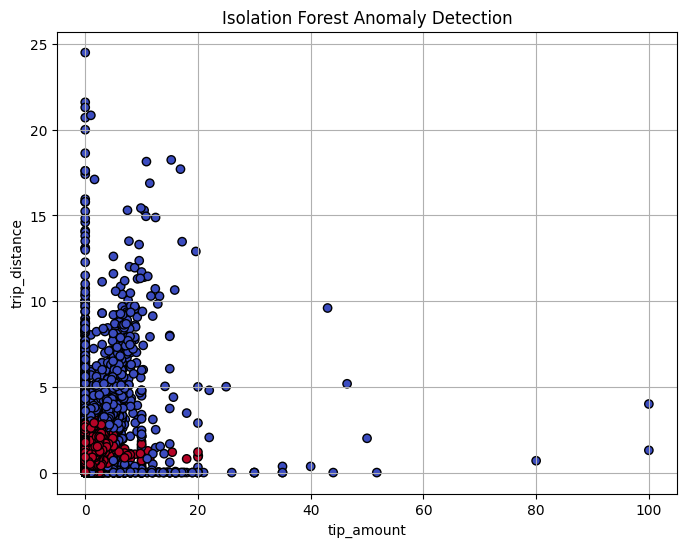

In [0]:


plt.figure(figsize=(8, 6))
plt.scatter(iso_anomaly_df['tip_amount'], iso_anomaly_df['trip_distance'], c=iso_anomaly_df['anomaly'], cmap='coolwarm', edgecolor='k')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("tip_amount")
plt.ylabel("trip_distance")
plt.grid(True)
plt.show()

#### Estimators

In [0]:
estimators = iso_forest.estimators_
first_tree = estimators[0].tree_
print("Features used for splits:", first_tree.feature)
print('-'*80)
print("Thresholds for splits:", first_tree.threshold)

Features used for splits: [ 0  0  1  3  1 -2  1  0  4 -2 -2  0 -2 -2  0  0 -2 -2 -2  1  0  4 -2 -2
 -2 -2  4  2  0  0  1 -2 -2 -2  0  3 -2 -2  0 -2 -2  2  2  1 -2 -2  4 -2
 -2  1  0 -2 -2 -2  1  3  2  0 -2 -2  1 -2 -2  1  1 -2 -2  0 -2 -2  2  3
 -2  0 -2 -2  3  1 -2 -2  1 -2 -2  0  0 -2 -2  2  0  1 -2 -2  1 -2 -2  4
 -2  2 -2 -2  3 -2  1 -2  4 -2 -2]
--------------------------------------------------------------------------------
Thresholds for splits: [ 3.97922570e+00  2.96012608e+00  3.36784041e+00  1.94388352e-01
 -3.33035226e-01 -2.00000000e+00  2.86310700e+00  1.75594118e-02
  1.42864352e+00 -2.00000000e+00 -2.00000000e+00  3.05600122e-02
 -2.00000000e+00 -2.00000000e+00  2.44144616e-01  1.10605333e-01
 -2.00000000e+00 -2.00000000e+00 -2.00000000e+00  2.66240172e+00
  9.36057743e-02  2.56954804e-01 -2.00000000e+00 -2.00000000e+00
 -2.00000000e+00 -2.00000000e+00  7.53104435e+00  1.62056099e+00
  1.73637996e-01  1.35446138e-01  2.06647061e+01 -2.00000000e+00
 -2.00000000e+00 -2.000

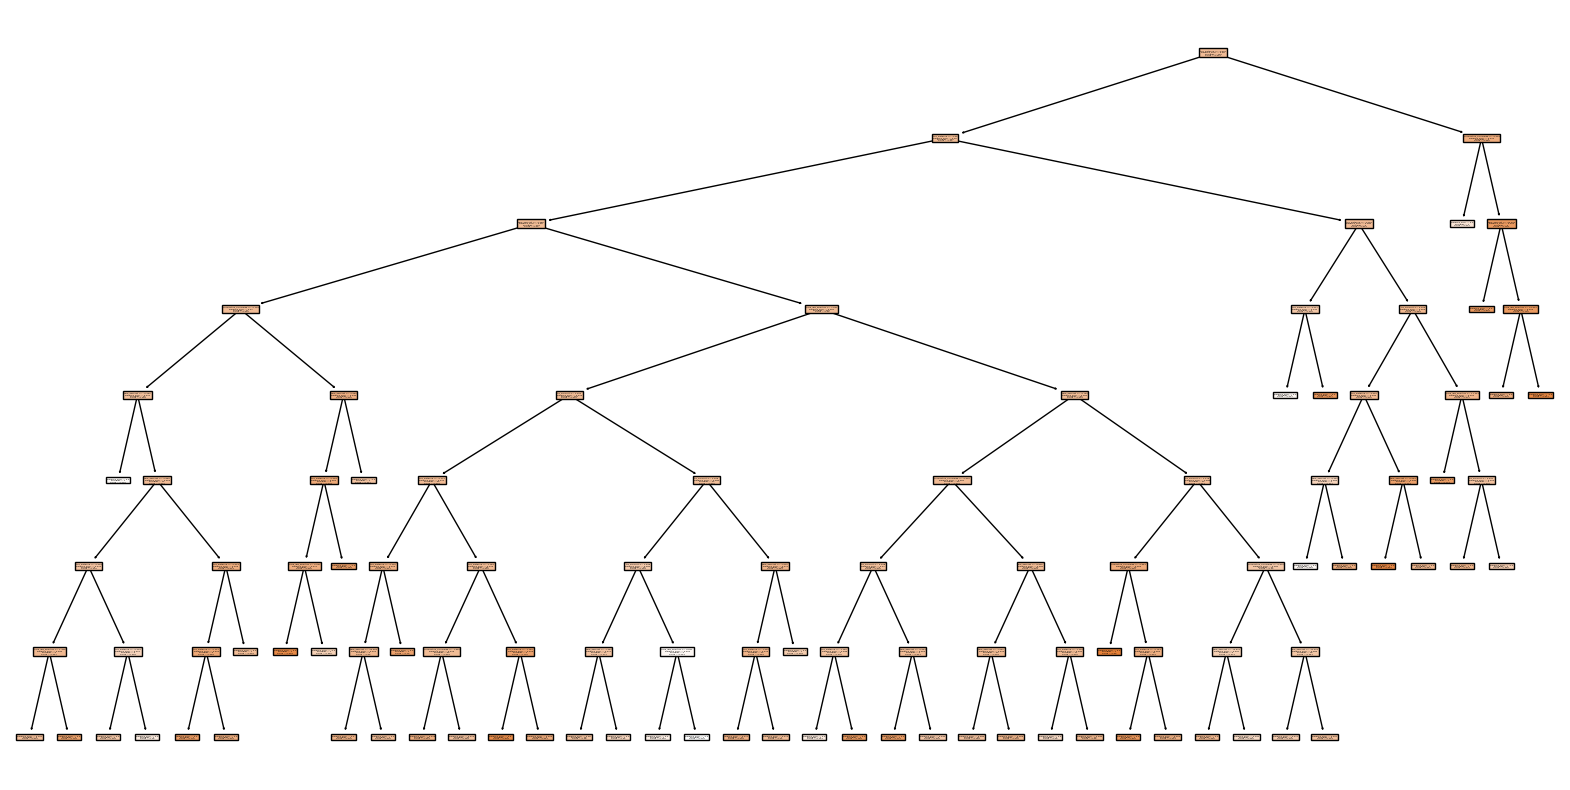

In [0]:
plt.figure(figsize=(20, 10))
plot_tree(estimators[0], filled=True, feature_names=input_cols)
plt.show()

# Note: the value is the node impurity value. Meaning how many features were involved. 

#### SHAP


In [0]:
payment_df

trip_distance  fare_amount  ...  time_diff_minutes  anomaly
0                0.41          4.0  ...              2.783        1
1                0.41          3.5  ...              1.033        1
2                0.40          4.0  ...              2.683       -1
3                0.27          3.0  ...              0.833        1
4                1.34          6.0  ...              4.967        1
...               ...          ...  ...                ...      ...
100550           0.90          5.5  ...              4.983        1
100551           0.49          4.5  ...              3.050        1
100552           0.03          2.5  ...              0.783        1
100553           1.52          7.0  ...              5.750        1
100554           2.90         12.0  ...             11.567        1

[100555 rows x 6 columns]

# Simple dataset for testing

Features: trip_distance, time_diff_minutes

In [0]:
dist_time = ["trip_distance", "time_diff_minutes"]

simple_df = get_data(dist_time)
simple_df.head(10)

# train test split

train_df, test_df = train_test_split(simple_df, test_size=0.2, random_state=42)

## Num Estimators

Only downside of a higher number of estimators is time. There are no chances of overfitting, just more likely to pick up anomalies. Ofc, not to the extreme, but should time models with 10 - 500 estimators. Hence, pick a n_estimators where adding more estimators does not increase the number anomalies detected significantly. 

In [0]:
# Desired measurement

time_to_train = []
anomaly_variance_time = []
anomaly_variance_dist = []

# params

contamination = 0.5 # 10%
random_state = 42

In [0]:

def train_simple_iso_forest(num_estimators, train_df, test_df, contamination):

    # train iso_forest
    s_time = time.time()

    iso_forest = IsolationForest(n_estimators = num_estimators, contamination = contamination, random_state = random_state)

    iso_forest.fit(train_df)

    anomalies = iso_forest.predict(test_df)

    e_time = time.time()
    train_time = e_time - s_time   

    # record anomaly variance
    df_results = test_df.copy()
    df_results["anomaly"] = anomalies

    print(anomalies)

    var_time = df_results.loc[df_results['anomaly'] == -1, 'time_diff_minutes'].var()
    var_dist = df_results.loc[df_results['anomaly'] == -1, 'trip_distance'].var()

    anomaly_variance_time.append(var_time)
    anomaly_variance_dist.append(var_dist)
    
    # record time to train
    time_to_train.append(train_time)

    return df_results


X does not have valid feature names, but IsolationForest was fitted with feature names


[1 1 1 ... 1 1 1]


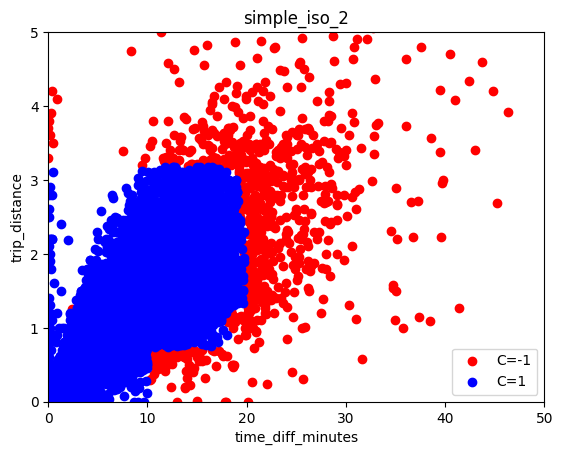

X does not have valid feature names, but IsolationForest was fitted with feature names


[1 1 1 ... 1 1 1]


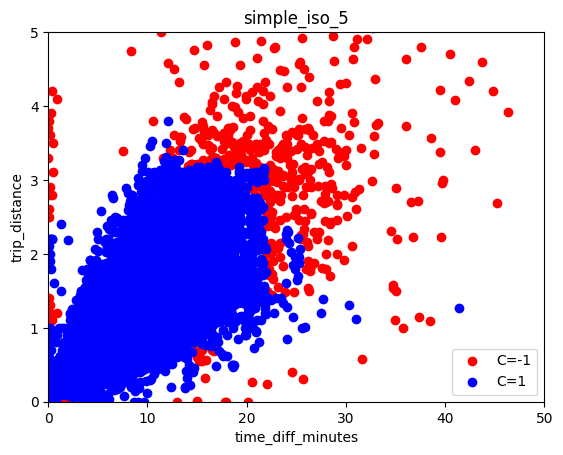

X does not have valid feature names, but IsolationForest was fitted with feature names


[1 1 1 ... 1 1 1]


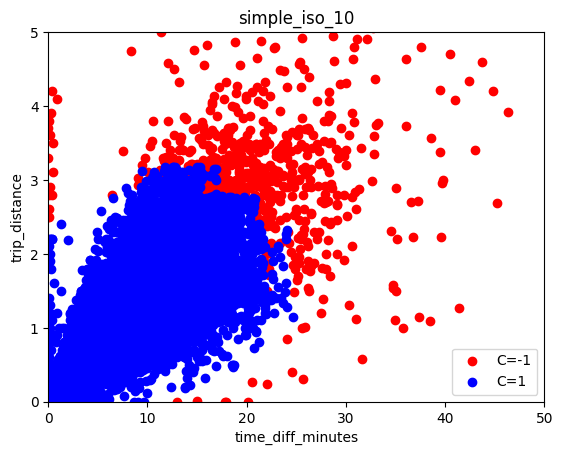

X does not have valid feature names, but IsolationForest was fitted with feature names


[ 1 -1  1 ...  1  1  1]


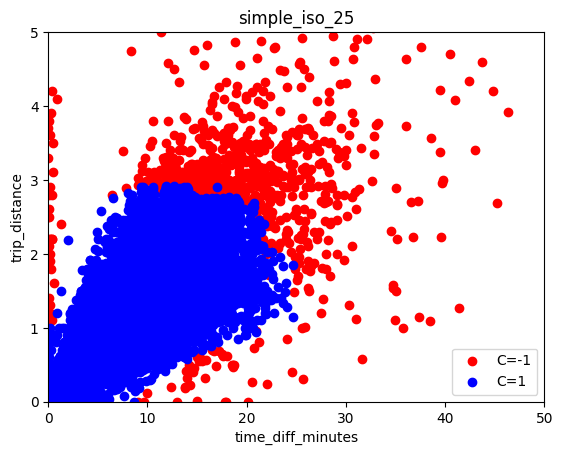

X does not have valid feature names, but IsolationForest was fitted with feature names


[ 1 -1  1 ...  1  1  1]


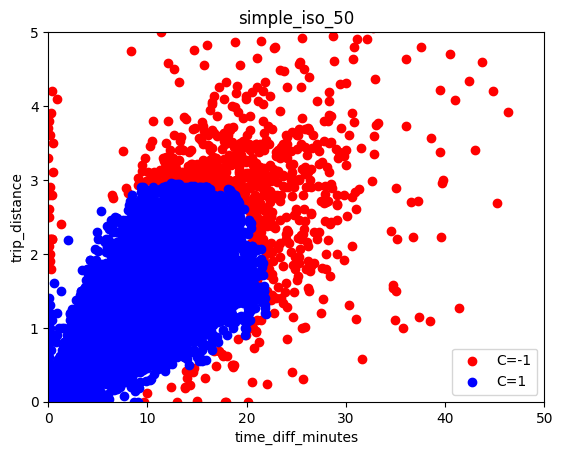

X does not have valid feature names, but IsolationForest was fitted with feature names


[ 1 -1  1 ...  1  1  1]


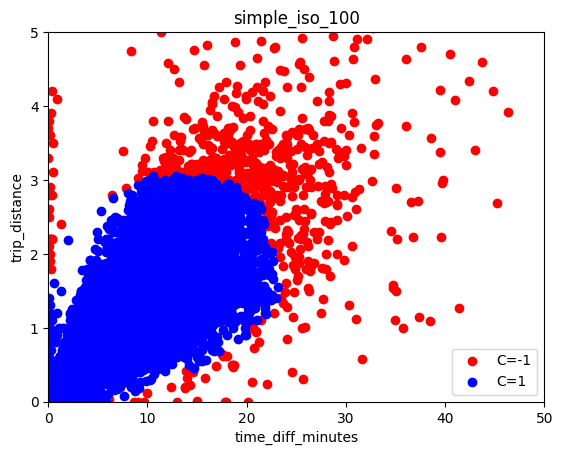

X does not have valid feature names, but IsolationForest was fitted with feature names


[ 1 -1  1 ...  1  1  1]


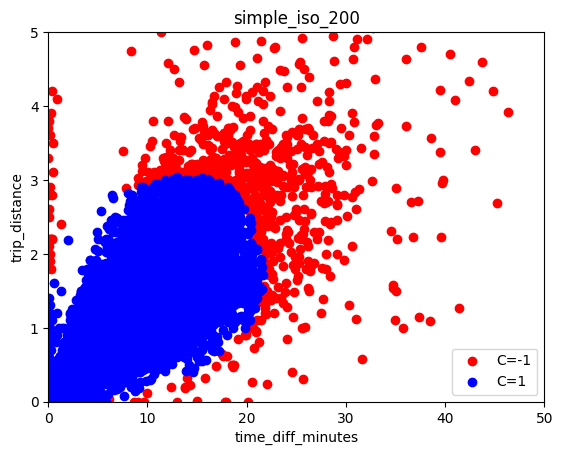

X does not have valid feature names, but IsolationForest was fitted with feature names


[ 1 -1  1 ...  1  1  1]


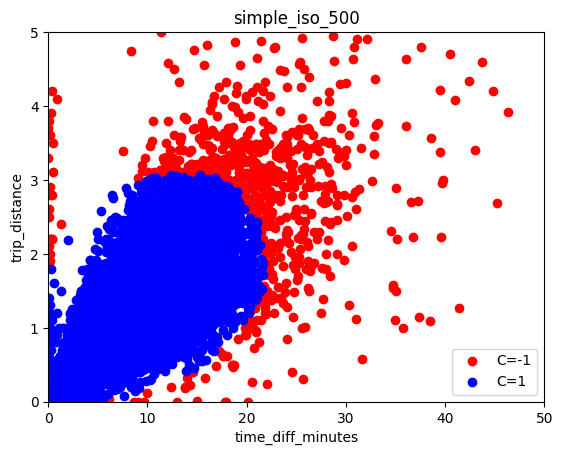

<Figure size 640x480 with 0 Axes>

In [0]:
# Create a looop that trains Isolation Forest models

num_estimators = [2, 5, 10, 25, 50, 100, 200, 500]

plt.ion() 

for num in num_estimators:
    df_results = train_simple_iso_forest(num, train_df, test_df, 0.05)
     # plot 2d result
    plt.scatter(df_results.loc[df_results['anomaly'] == -1, 'time_diff_minutes'], df_results.loc[df_results['anomaly'] == -1, 'trip_distance'], c='red', label='C=-1')

    plt.scatter(df_results.loc[df_results['anomaly'] == 1, 'time_diff_minutes'], df_results.loc[df_results['anomaly'] == 1, 'trip_distance'], c='blue', label='C=1')

    plt.xlabel('time_diff_minutes')
    plt.ylabel('trip_distance')
    plt.title('simple_iso_'+str(num))

    plt.xlim(0, 50)
    plt.ylim(0, 5)

    plt.legend()
    plt.draw()
    plt.pause(0.001)
    plt.clf()
plt.ioff()
plt.show()


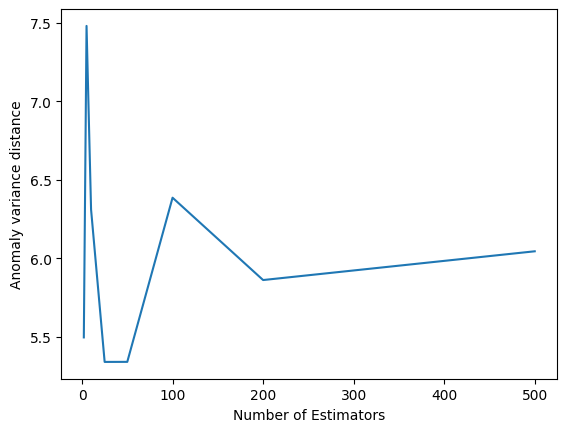

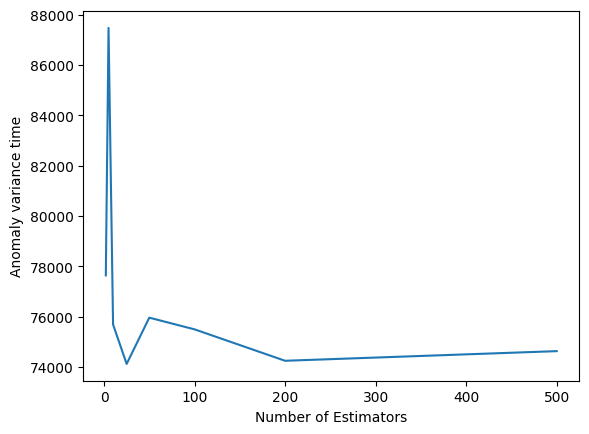

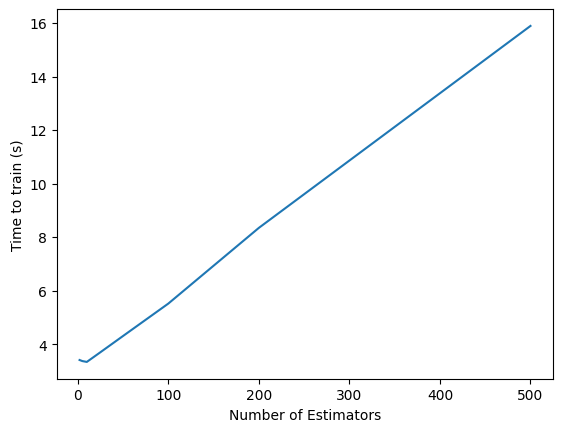

In [0]:
# present results

plt.plot(num_estimators, anomaly_variance_dist)
plt.xlabel("Number of Estimators")
plt.ylabel("Anomaly variance distance")
plt.show()

plt.plot(num_estimators, anomaly_variance_time)
plt.xlabel("Number of Estimators")
plt.ylabel("Anomaly variance time")
plt.show()

plt.plot(num_estimators, time_to_train)
plt.ylabel("Time to train (s)")
plt.xlabel("Number of Estimators")
plt.show()


## Contamination value

Look at the variance in the different feature values

In [0]:
time_to_train_cont = []
anomaly_variance_time_cont = []
anomaly_variance_dist_cont = []

# params
random_state = 42
n_estimators = 500

In [0]:

def train_simple_iso_forest(contamination, train_df, test_df):

    # train iso_forest
    s_time = time.time()

    iso_forest = IsolationForest(n_estimators = n_estimators, contamination = contamination, random_state = random_state)

    iso_forest.fit(train_df)

    anomalies = iso_forest.predict(test_df)

    e_time = time.time()
    train_time = e_time - s_time   

    # record anomaly variance
    df_results = test_df.copy()
    df_results["anomaly"] = anomalies

    var_time = df_results.loc[df_results['anomaly'] == -1, 'time_diff_minutes'].var()
    var_dist = df_results.loc[df_results['anomaly'] == -1, 'trip_distance'].var()

    anomaly_variance_time_cont.append(var_time)
    anomaly_variance_dist_cont.append(var_dist)
    
    # record time to train
    time_to_train_cont.append(train_time)

    # plot 2d result

    plt.scatter(df_results.loc[df_results['anomaly'] == 1, 'time_diff_minutes'], df_results.loc[df_results['anomaly'] == 1, 'trip_distance'], c='blue', label='normal')


    plt.scatter(df_results.loc[df_results['anomaly'] == -1, 'time_diff_minutes'], df_results.loc[df_results['anomaly'] == -1, 'trip_distance'], c='red', label='anomaly')

    plt.ylim(0, 5)
    plt.xlim(0, 5)

    plt.xlabel('time_diff_minutes')
    plt.ylabel('trip_distance')
    plt.title('simple_iso_'+str(contamination))

    plt.legend()
    plt.show()
    

## Find optimal contamination

X does not have valid feature names, but IsolationForest was fitted with feature names


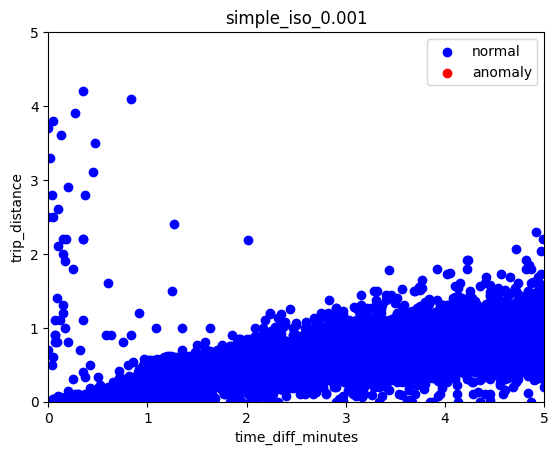

X does not have valid feature names, but IsolationForest was fitted with feature names


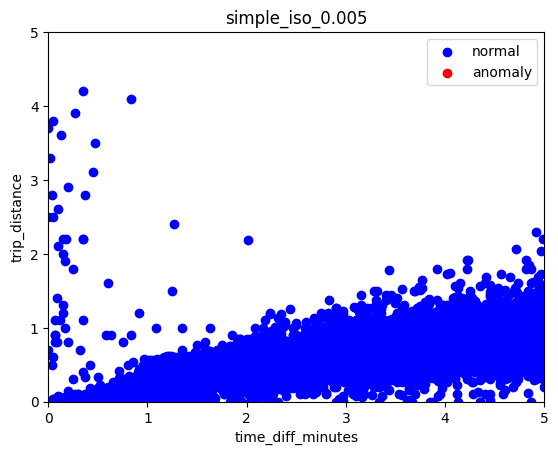

X does not have valid feature names, but IsolationForest was fitted with feature names


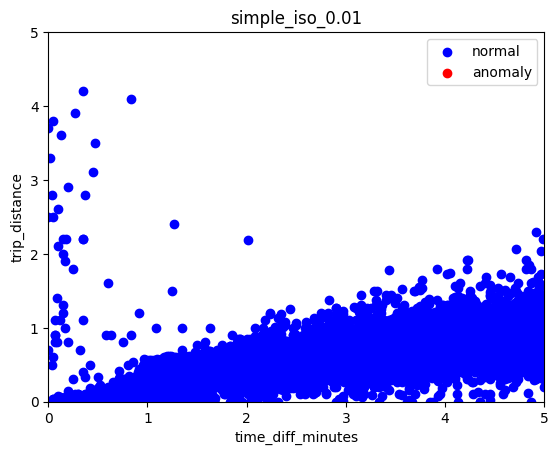

X does not have valid feature names, but IsolationForest was fitted with feature names


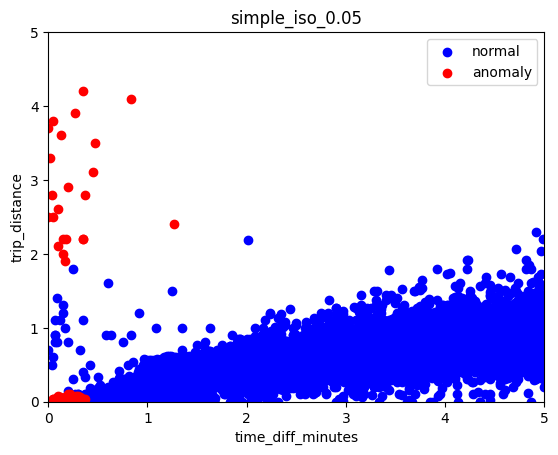

X does not have valid feature names, but IsolationForest was fitted with feature names


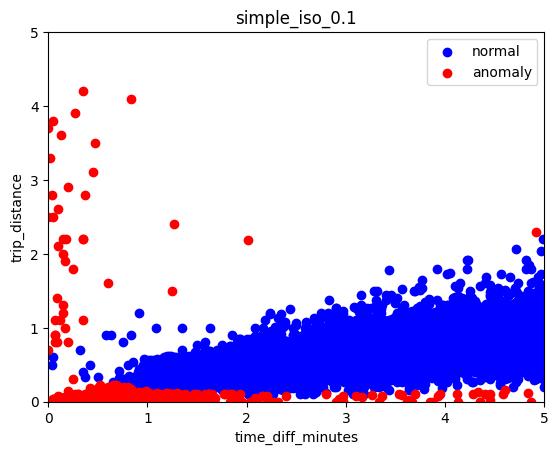

X does not have valid feature names, but IsolationForest was fitted with feature names


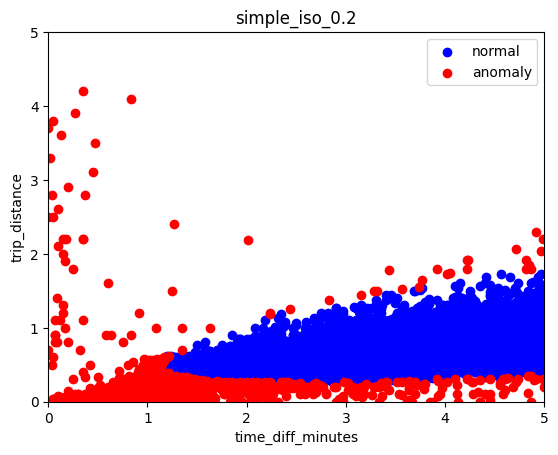

In [0]:
contamination = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

#do some fitering. 

for cont in contamination:
    train_simple_iso_forest(cont, train_df, test_df)

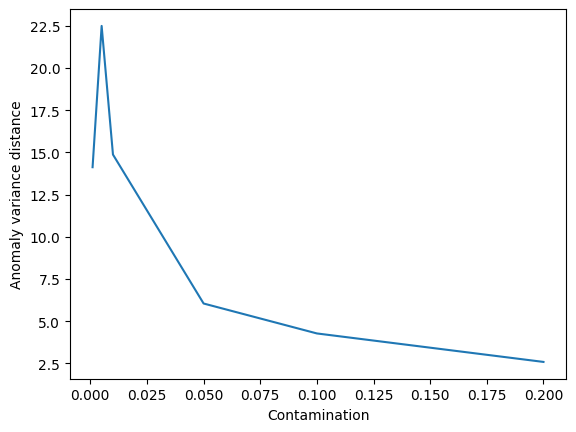

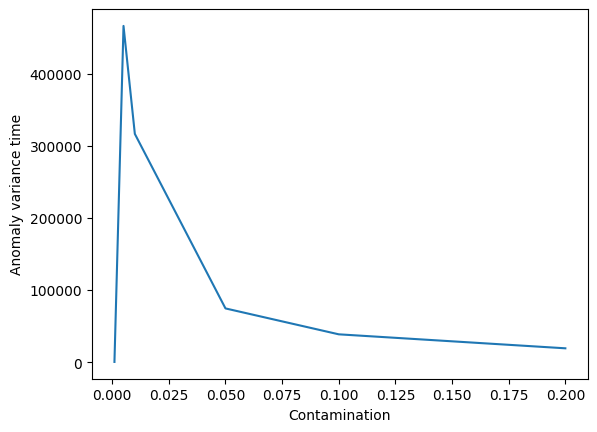

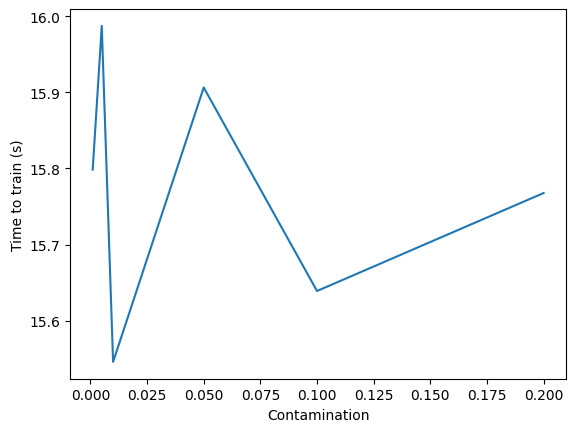

In [0]:
plt.plot(contamination, anomaly_variance_dist_cont)
plt.xlabel("Contamination")
plt.ylabel("Anomaly variance distance")
plt.show()

plt.plot(contamination, anomaly_variance_time_cont)
plt.xlabel("Contamination")
plt.ylabel("Anomaly variance time")
plt.show()

plt.plot(contamination, time_to_train_cont)
plt.ylabel("Time to train (s)")
plt.xlabel("Contamination")
plt.show()

In [0]:
print(anomaly_variance_dist_cont[-1])
print(anomaly_variance_time_cont[-1])


print(test_df["time_diff_minutes"].var())
print(test_df["trip_distance"].var())

2.581706482059916
19278.646755552836
3962.5820801621426
0.7633871071579585


## Best model evaluation


In [0]:
contamination = 0.05 #5%
num_estimators = 25
random_state = 42

input_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'time_diff_minutes']


In [0]:
model_df = get_data(input_cols)
model_df.head()

trip_distance  fare_amount  ...  congestion_surcharge  time_diff_minutes
0           0.41          4.0  ...                   0.0              2.783
1           0.41          3.5  ...                   0.0              1.033
2           0.40          4.0  ...                   0.0              2.683
3           0.27          3.0  ...                   2.5              0.833
4           1.34          6.0  ...                   2.5              4.967

[5 rows x 5 columns]

In [0]:
s_time = time.time()

iso_forest = IsolationForest(n_estimators = num_estimators, contamination = contamination, random_state = random_state)

iso_forest.fit(model_df)

anomalies = iso_forest.predict(model_df)

e_time = time.time()
print(f"Time: {e_time - s_time}")

X does not have valid feature names, but IsolationForest was fitted with feature names


Time: 6.287631988525391


In [0]:
results = model_df.copy()
results["outliers"] = anomalies
results.head()

trip_distance  fare_amount  ...  time_diff_minutes  outliers
0           0.41          4.0  ...              2.783         1
1           0.41          3.5  ...              1.033         1
2           0.40          4.0  ...              2.683        -1
3           0.27          3.0  ...              0.833         1
4           1.34          6.0  ...              4.967         1

[5 rows x 6 columns]

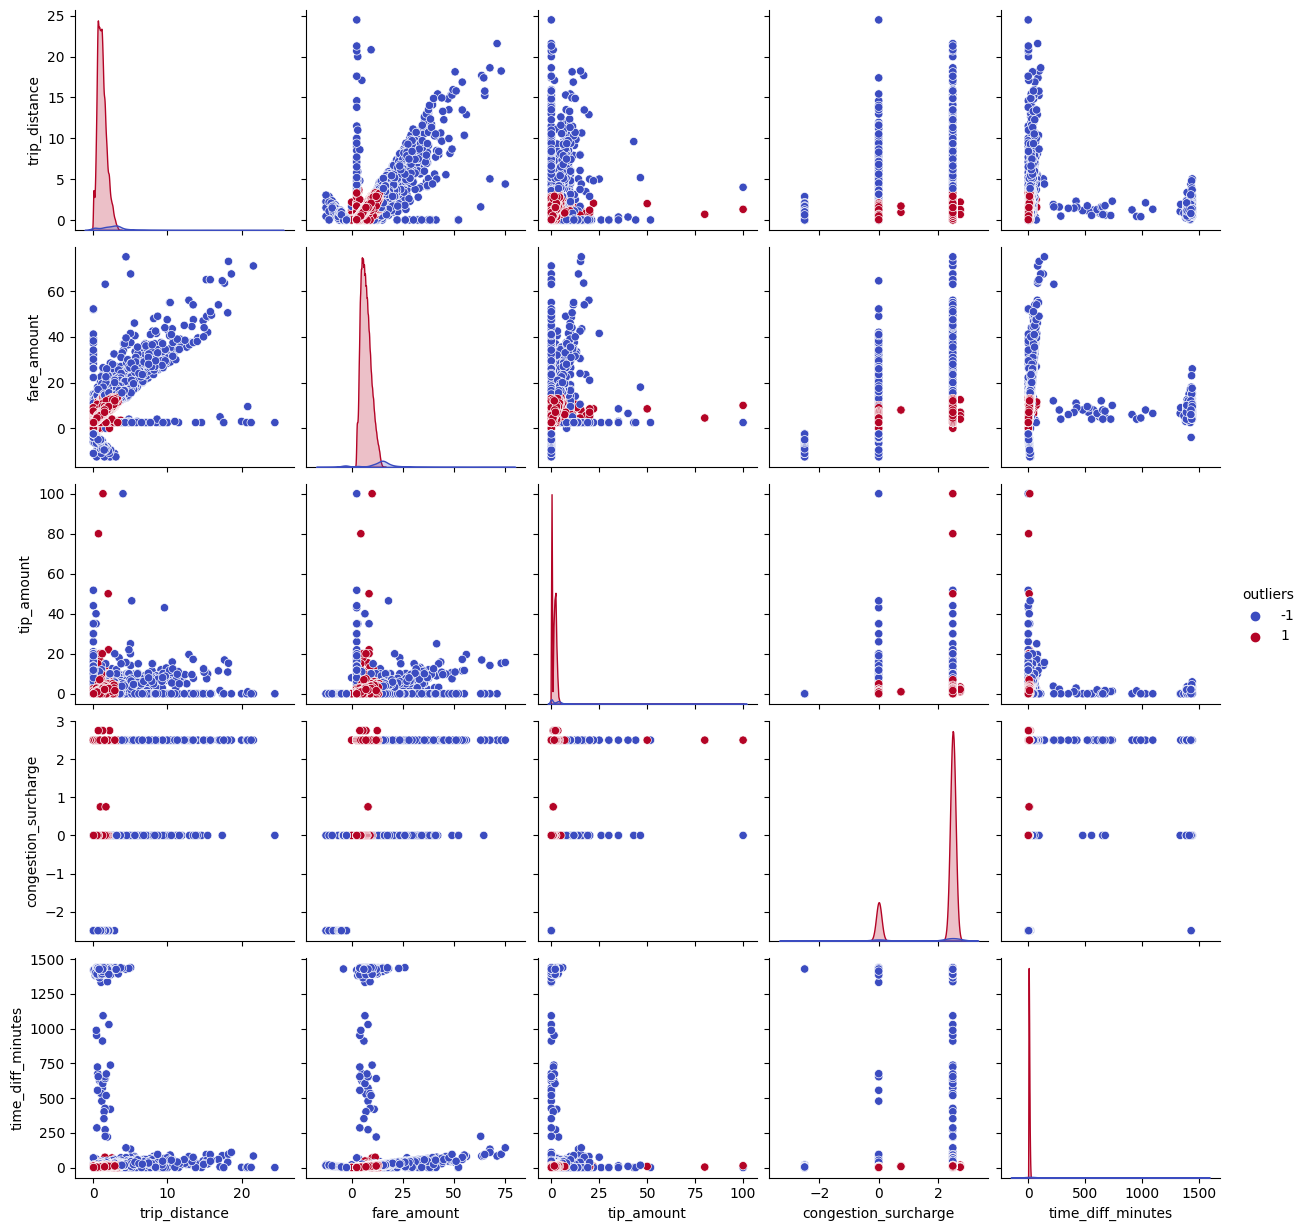

In [0]:
sns.pairplot(results, hue="outliers", palette="coolwarm")
plt.show()